In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.applications import vgg16
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import load_img

from fonction import *

In [2]:
def extract_features(file, model):
    """
    Fonctions qui extrait le descripteur d'image dans un modele 
    de tranfert learning
    """ 
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features


In [3]:
df=pd.read_csv("df_text_final.csv")
df.head(5)

,uniq_id,product_name,description_caller,category_1,description_bow_lem,description_dl,description_product_bow_lem,description_product_dl,length_bow,length_dl,...,zinc,zingalalaa,zip,zipexterior,zipper,zippered,zone,zoom,zora,zyxel
0,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,Key Features of Elegance Polyester Multicolor ...,Home Furnishing,"['key', 'feature', 'elegance', 'polyester', 'm...","['key', 'features', 'of', 'elegance', 'polyest...","['elegance', 'polyester', 'multicolor', 'abstr...","['elegance', 'polyester', 'multicolor', 'abstr...",467,749,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,Specifications of Sathiyas Cotton Bath Towel (...,Baby Care,"['specification', 'sathiyas', 'cotton', 'bath'...","['specifications', 'of', 'sathiyas', 'cotton',...","['sathiyas', 'cotton', 'bath', 'towel', 'speci...","['sathiyas', 'cotton', 'bath', 'towel', 'speci...",190,258,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,Key Features of Eurospa Cotton Terry Face Towe...,Baby Care,"['key', 'feature', 'eurospa', 'cotton', 'terry...","['key', 'features', 'of', 'eurospa', 'cotton',...","['eurospa', 'cotton', 'terry', 'face', 'towel'...","['eurospa', 'cotton', 'terry', 'face', 'towel'...",473,779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,Key Features of SANTOSH ROYAL FASHION Cotton P...,Home Furnishing,"['key', 'feature', 'santosh', 'royal', 'fashio...","['key', 'features', 'of', 'santosh', 'royal', ...","['santosh', 'royal', 'fashion', 'cotton', 'pri...","['santosh', 'royal', 'fashion', 'cotton', 'pri...",343,448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,Key Features of Jaipur Print Cotton Floral Kin...,Home Furnishing,"['key', 'feature', 'jaipur', 'print', 'cotton'...","['key', 'features', 'of', 'jaipur', 'print', '...","['jaipur', 'print', 'cotton', 'floral', 'king'...","['jaipur', 'print', 'cotton', 'floral', 'king'...",468,694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
img_dir = r'C:\Users\cardn\P6_Huamani_Luis_2\Dataset+projet+pretraitement+textes+images\Flipkart\Images/'

In [5]:
## characteristiques d'image et le nombre de classe 
img_rows, img_cols = 224, 224 
num_classes = 7

## on entraine le model avec le model imagenet
vgg = vgg16.VGG16()

for layer in vgg.layers:
    layer.trainable = False

model = Model(inputs = vgg.input, outputs = vgg.layers[-2].output)

In [6]:
features=[]
for indice,values in enumerate(df['uniq_id']):
    try:
        feature=extract_features(f"{img_dir}{values}.jpg", model)
        features.append(feature)
    except:
        feature=extract_features(f"{img_dir}{values}.jpeg", model)
        features.append(feature)

1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 128ms/step


1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 136ms/step


1/1 [==============================] - 0s 134ms/step


C:\Users\cardn\anaconda3\lib\site-packages\PIL\Image.py:2896: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


1/1 [==============================] - 0s 137ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 146ms/step


In [7]:
category = df['category_1'].sort_values().unique()
category  

array(['Baby Care ', 'Beauty and Personal Care ', 'Computers ',
       'Home Decor & Festive Needs ', 'Home Furnishing ',
       'Kitchen & Dining ', 'Watches '], dtype=object)

In [8]:
sift_keypoints_by_img = np.asarray(features)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

In [9]:
kmeans=kmeans_model(category,img_dir,sift_keypoints_all,7)

C:\Users\cardn\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1043: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1536 or by setting the environment variable OMP_NUM_THREADS=5
  warnings.warn(


In [10]:
# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

In [11]:
ARI, X_tsne, labels=ARI_fct(df,'category_1',im_features)

ARI :  0.3295 time :  13.0


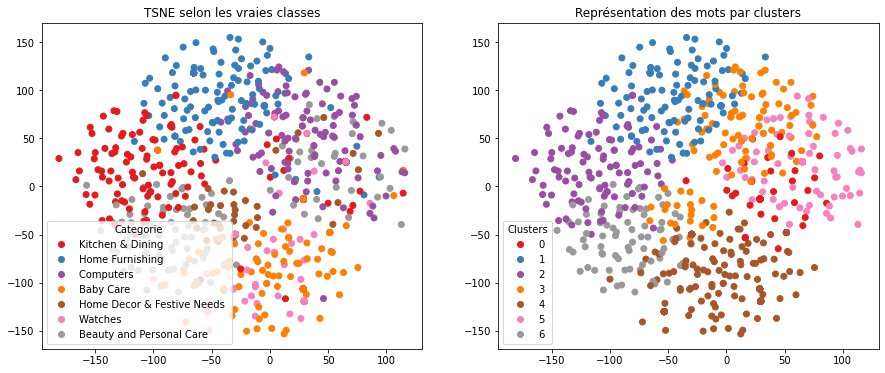

ARI :  0.3295


In [13]:
TSNE_visu_fct(df,'category_1',X_tsne, labels, ARI,'TSNE selon les vraies classes')

On observe bien que avec le modele Vgg16, la creation de cluster a partir des images est amelioré, on peut donc concluire qu'il est possible de creer des cluster avec les images et avec le texte.